<a href="https://colab.research.google.com/github/vinihora/portfolio_data_science/blob/main/projects/TItanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic - Uma análise sobre o acidente**

Esta análise parte de um desafio proposto pela plataforma [Kaggle](https://www.kaggle.com/competitions/titanic/data).

Sabe-se que o desastre acabou com inúmeras vidas devido a colisão do maior e mais técnologico navio da época com um iceberg.

Apesar do grande número de mortes, o naufrágio contou com alguns sobreviventes que puderam detalhar e contar histórias sobre o momento que fascinam muitos hostoriadores e curiosos até hoje.

<br>
<center><img alt="Analisando Airbnb" width="100%" src="https://raw.githubusercontent.com/carlosfab/data_science/12a0756780e50508d6142f8b32576e2812369415//img/titanic.jpeg"></center>
<br>

Contudo, apesar de um acidente, muitas vidas foram perdidas por irresponsabilidade daqueles que gerenciavam a embarcação, pois já sabiam do problema de botes salva-vidas insuficiente a toda a tripulação. A partir dai, temos um enorme problema gerado: Quem seriam os escolhidos para serem salvos nos poucos botes que haviam no navio.

**O objetivo desse estudo é extrair conclusões relevantes sobre o grupo de sobreviventes do Titanic.**


# **Checklist**
Este estudo estará dividido em 3 principais etapas:
1. Introdução do problema
2. Obtenção dos dados
3. Análise exploratória

# **1. Introdução do problema**
O Titanic foi o maior e mais luxuoso navio de sua época, sua construção durou cerca de 2 anos, custando cerca de 7,5 milhões de dólares à época (cerca de 200 milhões de dólares atualmente).

A embarcação contava com 2224 passageiros no momento da colisão, dos quais somente 722 sobreviveram.

A hipótese do estudo é que existiam grupos que possuiam maior propensão a sobreviverem, entre eles, os principais aspectos: crianças, mulheres e passageiros das classes mais altas.

## **Objetivo**
Encontrar padrões dentro dos dados que explicitem a maior probabilidade de sobrevivência de alguns grupos.

# **2. Obtenção dos dados**

Os dados a serem utilizados são provenientes do desafio [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data) disponibilizado pela plataforma [Kaggle](https://www.kaggle.com).

Serão utilizados duas bases diferentes.

1. ```train.csv``` é a base de dados que possui as informações dos passageiros que estavam no Titanic durante a colisão
2. ```gender_submission.csv``` esta base possui a relação de quais passageiros sobreviveram ao desastre
<br>

Os dados se encontram no seguinte caminho: ```./dados/...```


In [2]:
#importa os módulos necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Após a importação dos módulos, os dados foram disponibilizados em um repositório público com a finalidade de acessá-los de maneira mais fácil.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vinihora/portfolio_data_science/main/dados/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **3. Análise exploratória**

Dicionário de variáveis

1. ```PassengerId``` - id do passageiro
2. ```Survived``` - 1 caso o passageiro tenha sobrevivido, 0 se não
3. ```Pclass``` - Classe do ticket do passageiro (1 = 1st, 2 = 2nd, 3 = 3rd)
4. ```Name``` - Nome
5. ```Sex``` - Sexo
6. ```Age``` - idade em anos
7. ```SibSp``` - Irmaõs e conjuges no Titanic
8. ```Parch``` -  Progenitores e Filhos no Titanic
9. ```Ticket``` - Número do ticket
10. ```Fare``` - Tarifa
11. ```Cabin``` - Número da cabine
12. ```Embarked``` - Portão de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-6-d29a23d1181c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);


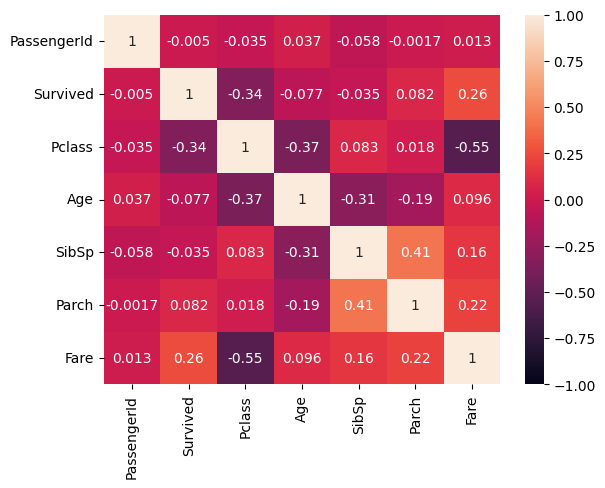

In [6]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

- A partir do gráfico de correlação, podemos sugerir algumas hipóteses iniciais.
- O primeiro ponto que chama atenção está relacionado a coluna ```Pclass``` com a coluna ```survived```. A partir desse nível considerável de correlação, podemos observar que o valor negativo de -0,34 nos supõe que aqueles que pagaram valores maio
res no preço da passagem, estão mais proprícios a sobreviver.
- Isso ocorre pelo seguinte motivo: Quanto maior for a classe do passageiro (Terceira classe), menor a chance dele de sobreviver ao acidente.
- Somente por essa análise, pode-se afirmar que ocorreu uma preferência no embarque das classes mais nobres nos botes salva-vidas.
- Outra possível hipótese se da em relação as chances de sobrevivência a depender do sexo, que será analisada logo em seguida.

In [7]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

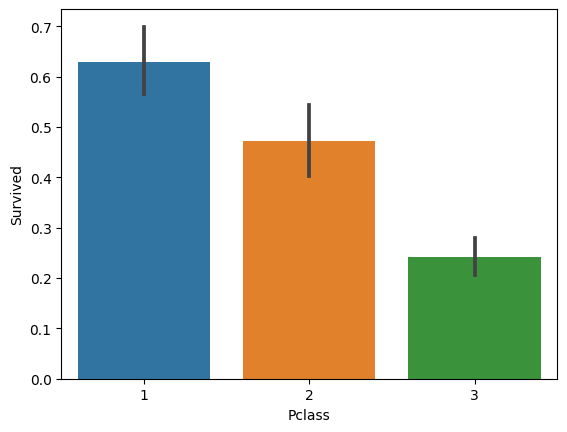

In [8]:
sns.barplot(x='Pclass', y='Survived', data=df)

- O gráfico acima confirma a hipótese de maior probabilidade de sobrevivência das classes mais nobres.
- Os passageiros da primeira classe, possuiam uma chance de 62% de sobrevivência, enquanto os passageiros da 3° classe tiveram apenas 24%. Ou seja, os passageiros da classe mais baixa, não tinham nem metade das chances de sobrevivência do que os mais ricos, evidenciando ainda mais a preferência no embarque ao bote salva-vidas.

- Outra hipótese que se faz presente é em relação a probabilidade de sobrevivência a depender do sexo, para isso, vamos analisar de maneira mais profunda essa relação

In [9]:
df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

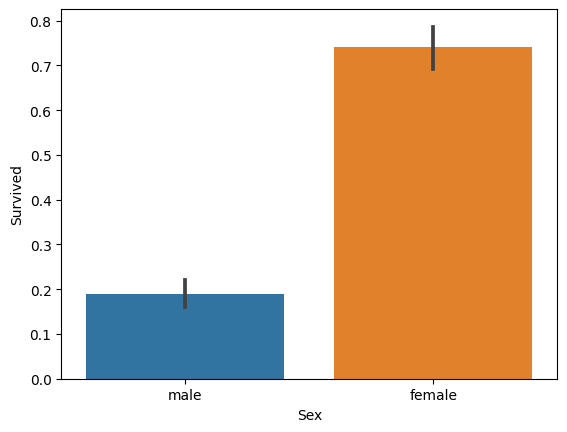

In [10]:
sns.barplot(x='Sex', y='Survived', data=df)

- Se em relação as classes sociais já conseguimos ver enorme disparidade, quando falamos do sexo do passageiro essa diferença fica ainda mais evidente.
- Enquanto as mulheres apresentaram 75% de probabilidade de sobrevivência, os homens tiveram apenas 18%, menos de 1/3.

- Como última hipótese, analisaremos se a idade foi um fator determinando para a sobrevivência dos passageiros. Será que as crianças tiveram mais chances?

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


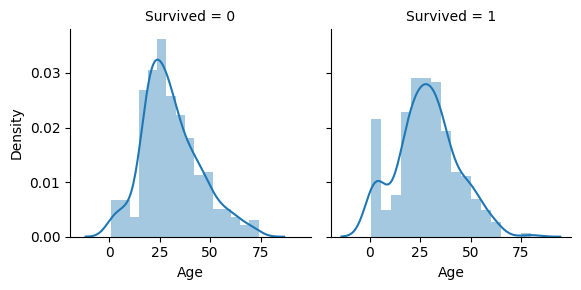

In [17]:
age_survived = sns.FacetGrid(df, col='Survived');
age_survived.map(sns.distplot, 'Age');

- Podemos observar uma tendência a distribuição normal em ambas as situações.
- O fato que mais chamou atenção foi para o gráfico de Survived = 1, no qual apresentou um pico de sobreviventes para crianças pequenas, logo no início do gráfico.

# **Conclusões**

Após a análise dos dados, podemos destacar 3 principais grupos que tiveram maior probabilidade de sobrevivência.

- Passageiros das classes mais nobres, o estudo mostoru que a probabilidade de sobreviver na primeira classe, é mais que o dobro dos passageiros da terceira.

- O grupo de mulheres foram o grupo de maior destaque, devido a sua enorme vantagem na probabilidade de sobrevivência em relação ao homens.

- O último grupo que tambêm apresentou maiores probabilidades foram os das crianças.